# IF3270 Pembelajaran Mesin Feedforward Neural Network


Group Number: 18

Group Members:
- Dhafin Fawwaz Ikramullah (13522084)
- Raden Rafly Hanggaraksa B (13522014)
- Saad Abdul Hakim (13522092)


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pickle
from sklearn.datasets import fetch_openml
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

## Import Dataset

In [ ]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

pd.DataFrame(X).to_csv('dataset/X.csv', index=False)
pd.DataFrame(y).to_csv('dataset/y.csv', index=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for k in range(10):
    l1_plot = plt.subplot(2, 5, k + 1)
    l1_plot.imshow(
        coef[k].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % k)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

# Visualize

In [ ]:
X_csv = pd.read_csv("dataset/X.csv")
y_csv = pd.read_csv("dataset/y.csv")

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, train_size=train_samples, test_size=10000
# )

In [ ]:
from matplotlib.axes._axes import Axes

def visualize(X, y, row_count, col_count, offset = 0):
    # scale = np.abs(X).max()
    scale = 255 # in case we only pick some data and none of them reach the max value (255). 
    fig, axes = plt.subplots(row_count, col_count, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    for i in range(row_count * col_count):
        ax: Axes = axes[i // col_count, i % col_count]
        
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(str(i+offset)+": "+str(int(y[i+offset])))
        
        ax.imshow(
            X[i+offset].reshape(28, 28),
            interpolation="nearest",
            cmap=plt.cm.RdBu,
            vmin=-scale,
            vmax=scale,
        )

    plt.show()

In [ ]:
row_count = 10
col_count = 10

X_data = X_csv.to_numpy()
y_data_temp = y_csv.to_numpy()
y_data = np.zeros(len(y_data_temp))
for k in range(len(y_data_temp)):
    y_data[k] = y_data_temp[k][0]

print(X_data.shape)
print(y_data.shape)

visualize(X_data, y_data, row_count, col_count, 0)

## Implementation

## With Library

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
print(clf.score(X_test, y_test))
# X_MLP = X_test[0:5]
# y_MLP = clf.predict(X_MLP)
# visualize(X_MLP, y_MLP, 1, 3)
# print(X_MLP)
# print(y_MLP)


y_MLP = clf.predict(X_data)
print(X_data.shape)
print(y_MLP.shape)
visualize(X_data, y_MLP, 10, 10, 0)

In [ ]:
differences = 0
for k in range(len(y_data)):
    if int(y_data[k]) != int(y_MLP[k]):
        differences += 1
print(differences)

print(str((1-differences/len(y_data)) * 100) + "%")

In [ ]:
from typing import Literal, Callable, Union
import numpy as np
from numpy.typing import NDArray, ArrayLike
from src.model.WeightInitialization import WeightInitiator


class FFNNClassifier:
    def __init__(self,
            hidden_layer_sizes: NDArray,
            activation_func: Literal['linear', 'relu', 'sigmoid', 'tanh', 'softmax'],
            learning_rate: float,
            verbose: int, # 0: no print, 1: print epoch progress
            max_epoch: int,
            batch_size: int,
            loss_func: Literal['mean_squared_error', 'binary_cross_entropy', 'categorical_cross_entropy'],
            init_method: Literal['normal', 'zero', 'uniform'] = 'zero',
            lower_bound: float = 0.0,
            upper_bound: float = 1.0,
            mean: float = 0.0,
            std: float = 1.0,
            seed: int | None = None,
        ):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.X: NDArray = []
        self.y: list[ArrayLike] = []
        self.weights_history: list[NDArray] = [] # array of weight matrix. index is current epoch
        self.biases_history: list[ArrayLike] = [] # array of bias list. index is current epoch
        self.weight_gradients_history: list[NDArray] = [] # array of weight gradients. index is current epoch

        self.activation_func = activation_func
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.epoch_amount = max_epoch
        self.batch_size = batch_size
        self.loss_func = loss_func

        self.init_method = init_method
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.mean = mean
        self.std = std
        self.seed = seed


    # return [ matrix, matrix, matrix ... ] where matrix is the weight adjacency matrix for each layer. length should be number of layers - 1 because its like the edges/connection between the nodes
    def _generate_initial_weights(self):
        len_features = len(self.X[0])
        layers = np.copy([len_features])
        len_classes = np.array([len(np.unique(self.y))])
        if (
            self.loss_func == 'mean_squared_error' or
            (
                self.loss_func == 'binary_cross_entropy' and
                self.activation_func == 'sigmoid' or
                self.activation_func == 'softmax'
            ) or
            (
                self.loss_func == 'categorical_cross_entropy' and
                self.activation_func == 'softmax'
            )
        ):
            len_classes = np.array([10])
        layers = np.append(layers, self.hidden_layer_sizes)
        layers = np.append(layers ,len_classes)
        print("layers:", layers)
        self.init =  WeightInitiator(
            init_method=self.init_method,
            nodes=layers,
            lower_bound=self.lower_bound,
            upper_bound=self.upper_bound,
            mean=self.mean,
            std=self.std,
            seed=self.seed
        )
        return self.init.get_weights()

    # return [ float, float, float ... ] where float is the bias for each layer. length should be number of layers - 1 because input layer does not have bias
    def _generate_initial_biases(self):
        bias = self.init.get_bias()
        return bias


# region functions
    def _activation_function(self, x: Union[float, NDArray], func: str):
        if func == 'linear': return x
        elif func == 'relu': return np.maximum(0, x)
        elif func == 'sigmoid': return 1.0/(1.0 + np.exp(-x))
        elif func == 'tanh': return np.tanh(x)
        elif func == 'softmax':
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_x / np.sum(exp_x, axis=1, keepdims=True) # keepdims=True will keep the dimension of the original array
        raise "Activation function not supported!"

    def _activation_derived_function(self, x: Union[float, NDArray], func: str):
        if func == 'linear': return np.ones_like(x)
        elif func == 'relu': return np.where(x > 0, 1, 0)
        elif func == 'sigmoid':
            sig = self._activation_function(x, 'sigmoid')
            return sig * (1 - sig)
        elif func == 'tanh':
            p = 2.0/(np.exp(x) - np.exp(-x)) # should be the same as 1 - np.tanh(x) ** 2. will check later
            return p*p
        elif func == 'softmax': # TODO: Check if this implementation is correct
            delta = np.zeros_like(x)
            for i in range(x.shape[0]): delta[i, i] = 1
            softmax = self._activation_function(x, 'softmax')
            return softmax*(delta-softmax)
            # s = self._activation_function(x, 'softmax')
            # return s * (1 - s)
        raise "Activation function not supported!"


    def _loss_function(self, y_act, y_pred, number_of_classes, func: str):
        if func == 'mean_squared_error': return FFNNClassifier.mean_squared_error(y_act, y_pred)
        elif func == 'binary_cross_entropy': return FFNNClassifier.binary_cross_entropy(y_act, y_pred)
        elif func == 'categorical_cross_entropy': return FFNNClassifier.categorical_cross_entropy(y_act, y_pred, number_of_classes)
    def mean_squared_error(y_act, y_pred):
        return 2/len(y_act[0]) * (y_pred - y_act)
    def binary_cross_entropy(y_act, y_pred, n):
        return (y_pred - y_act)/(y_pred*(1 - y_pred))
    def categorical_cross_entropy(y_act, y_pred, c):
        return y_pred - y_act

# endregion functions


# region getters setters

    # Can only be called after setting X and y
    def _get_hidden_layer_sizes(self) -> np.typing.NDArray:

        len_features = len(self.X[0])
        len_classes = self._get_number_of_classes()
        layer_sizes = np.zeros(len(self.hidden_layer_sizes)+2, dtype=int)
        layer_sizes[0] = len_features
        for i in range(1, len(self.hidden_layer_sizes)+1):
            layer_sizes[i] = self.hidden_layer_sizes[i-1]
        layer_sizes[len(layer_sizes)-1] = len_classes

        return layer_sizes

    # Can only be called after setting X and y
    def _generate_new_empty_layers(self):

        layer_sizes = self._get_hidden_layer_sizes()
        network_depth = len(layer_sizes)
        weights = []
        biases = []
        nodes = []
        nodes_active = []
        for i in range(network_depth-1):
            weights.append(np.zeros((layer_sizes[i], layer_sizes[i+1])))
            biases.append(np.zeros(layer_sizes[i+1]))
        for i in range(network_depth):
            nodes.append(np.zeros(layer_sizes[i]))
            nodes_active.append(np.zeros(layer_sizes[i]))

        return weights, nodes, nodes_active, biases


    # Can only be called after setting X and y
    def _get_number_of_classes(self):
        # return len(np.unique(self.y))
        return 10 # hardcoded because it messes up things when the possible value is not much

    def copy_list_as_zeros(self, list: list[NDArray]):
        return [np.zeros_like(w) for w in list]

# endregion getters setters



    def fit(self, X: NDArray, y: NDArray):
        if type(y) == list and type(y[0]) != list:
            y = np.array([[i] for i in y])
        if type(y) == list and type(y[0]) == list:
            y = np.array(y)

        if len(X) != len(y):
            raise Exception("length of X and y is not the same")
        if len(X) == 0:
            raise Exception("len(self.X) == 0")
        if len(X[0]) == 0:
            raise Exception("len(self.X[0]) == 0")
        if len(y) == 0:
            raise Exception("len(self.y) == 0")

        # clean up in case this function is called multiple times
        self.X: NDArray = []
        self.y: ArrayLike = []
        self.weights_history: list[NDArray] = []
        self.biases_history: list[ArrayLike] = []
        self.weight_gradients_history: list[NDArray] = []


        self.X = X
        self.y = y
        initial_weight = self._generate_initial_weights()
        initial_bias = self._generate_initial_biases()
        self.weights_history = initial_weight
        self.biases_history = initial_bias
        initial_gradients = [np.zeros_like(w) for w in initial_weight]
        self.weight_gradients_history.append(initial_gradients)

        layer_sizes = self._get_hidden_layer_sizes()
        network_depth = len(layer_sizes)
        number_of_classes = self._get_number_of_classes()

        for epoch in range(self.epoch_amount):
            # for current_dataset_idx in range(len(self.X)):
            current_dataset_idx = 0
            while current_dataset_idx < len(self.X):
                weights, nodes, nodes_active, biases = self._generate_new_empty_layers() # will be filled with weights based on the previous epoch. Will be appended to the history after the end of the epoch

                # Feed Forward
                until_idx = min(current_dataset_idx+self.batch_size, len(self.X))
                nodes[0] = self.X[current_dataset_idx:until_idx]
                nodes_active[0] = self.X[current_dataset_idx:until_idx] # not passed to activation function for the first layer

                for k in range(1, network_depth):
                    w_k = self.weights_history[k-1]
                    b_k = self.biases_history[k-1]
                    h_k_min_1 = nodes_active[k-1]

                    a_k = b_k + np.dot(h_k_min_1, w_k) # numpy will automatically broadcast b_k (row will be copied to match the result from dot) so that this is addable

                    nodes[k] = a_k
                    nodes_active[k] = self._activation_function(a_k, self.activation_func)

                # print([p.shape for p in nodes_active])
                loss_grad = self._loss_function(
                    y_act=self.y[current_dataset_idx:until_idx],
                    y_pred=nodes_active[network_depth-1],
                    number_of_classes=number_of_classes,
                    func=self.loss_func
                )
                # print("self.y[current_dataset_idx:until_idx]: ", self.y[current_dataset_idx:until_idx])
                # print("nodes_active[network_depth-1]: ", nodes_active[network_depth-1])
                # print("loss_grad: ", loss_grad)


                # Backward Propagation
                weight_gradiens = [0 for i in range(len(self.weights_history))] # 0 will be replaced with numpy.array
                bias_gradiens = [0 for i in range(len(self.biases_history))] # 0 will be replaced with numpy.array

                delta = loss_grad * self._activation_derived_function(nodes[-1], self.activation_func)

                weight_gradiens[network_depth-2] = np.dot(nodes_active[-2].T, -delta)
                bias_gradiens[network_depth-2] = -delta


                for k in range(network_depth-2, 0, -1): # from the last hidden layer (not including the output layer)
                    w = self.weights_history[k]

                    delta = np.dot(delta, w.T) * self._activation_derived_function(nodes[k], self.activation_func)

                    weight_gradiens[k-1] = np.dot(nodes_active[k-1].T, -delta)
                    bias_gradiens[k-1] = -delta

                self.weight_gradients_history.append(weight_gradiens)

                # Update
                for k in range(network_depth-1):
                    w_k = self.weights_history[k]
                    b_k = self.biases_history[k]

                    weights[k] = w_k + self.learning_rate * weight_gradiens[k]

                    biases[k] = b_k + self.learning_rate * bias_gradiens[k]
                self.weights_history = weights
                self.biases_history = biases


                current_dataset_idx += self.batch_size
            #### while loop ends here ##############################################


            if self.verbose == 1:
                print(f"Epoch {epoch+1}/{self.epoch_amount} done")
            elif self.verbose == 2:
                print(f"========================================")
                print(f"Epoch {epoch+1}/{self.epoch_amount} done")
                print(f"weights: {self.weights_history}")
                print(f"biases: {self.biases_history}")


    def predict(self, X_test: NDArray):
        prediction = [-1 for i in range(len(X_test))]
        current_idx = 0
        while current_idx < len(X_test):
            weights, nodes, nodes_active, biases = self._generate_new_empty_layers()
            until_idx = min(current_idx+self.batch_size, len(X_test))
            nodes[0] = X_test[current_idx:until_idx]
            nodes_active[0] = X_test[current_idx:until_idx]

            for k in range(1, len(self.weights_history)+1):
                w_k = self.weights_history[k-1]
                b_k = self.biases_history[k-1]
                h_k_min_1 = nodes_active[k-1]

                a_k = b_k + np.dot(h_k_min_1, w_k)

                nodes[k] = a_k
                nodes_active[k] = self._activation_function(a_k, self.activation_func)
            predicted_class = [int(np.argmax(nodes_active[-1][i])) for i in range(len(nodes_active[-1]))] # idx with highest value. idx is also the class
            prediction[current_idx:until_idx] = predicted_class
            current_idx += self.batch_size

        return prediction



In [ ]:
# Case edunex

ffnn = FFNNClassifier(
    hidden_layer_sizes=[2],
    activation_func="sigmoid",
    learning_rate=0.5,
    verbose=1,
    max_epoch=1,
    batch_size=1,
    loss_func="mean_squared_error",
    init_method="normal",
    lower_bound=4,
    upper_bound=7,
    mean=24,
    std=2,
    seed=69
)
def _generate_initial_weights():
    return [np.array([[0.15, 0.25], [0.2, 0.3]]), np.array([[0.4, 0.5], [0.45, 0.55]])]
def _generate_initial_biases():
    return [np.array([0.35, 0.35]), np.array([0.6, 0.6])]
# ffnn._generate_initial_weights = _generate_initial_weights
# ffnn._generate_initial_biases = _generate_initial_biases

X_temp = np.array([[0.05, 0.1]])
y_temp = np.array([[0.01, 0.99]])
ffnn.fit(X_temp, y_temp)
# prediction = ffnn.predict(X_temp)
# print(prediction)

print("Final Weights:", ffnn.weights_history)
print("Final Biases:", ffnn.biases_history)

In [ ]:
# Case random

ffnn = FFNNClassifier(
    hidden_layer_sizes=[3,2,5],
    activation_func="sigmoid",
    learning_rate=0.5,
    verbose=1,
    max_epoch=5,
    batch_size=2,
    loss_func="mean_squared_error"
)

X_temp = np.array([[0.05, 0.1, 0.2, 0.25], [0.05, 0.1, 0.2, 0.25], [0.05, 0.1, 0.2, 0.25], [0.05, 0.1, 0.2, 0.25]])
y_temp = np.array([[0.01, 0.99], [0.01, 0.99], [0.01, 0.99], [0.01, 0.99]])
ffnn.fit(X_temp, y_temp)
prediction = ffnn.predict(X_temp)
print("Prediction:", prediction)
print("Final Weights:", ffnn.weights_history)
print("Final Biases:", ffnn.biases_history[-1])

In [ ]:
# Case random
def one_hot_encode(y):
    num_of_classes = 10
    arr = []
    for i in range(len(y)):
        arr.append([0 for j in range(num_of_classes)]) # hardcoded 10 for the number of classes
        arr[i][y[i]] = 1
    return arr


ffnn = FFNNClassifier(
    hidden_layer_sizes=[256, 128, 64],
    activation_func="sigmoid",
    learning_rate=0.05,
    verbose=1,
    max_epoch=15,
    batch_size=50,
    loss_func="mean_squared_error",
    init_method="normal",
    lower_bound=5.39294405e-05,
    upper_bound=1,
    mean=5.39294405e-05,
    std=.44,
    seed=69
)

train_until_idx = 10000
test_until_idx = 100
x_sliced = X_data[0:train_until_idx]
y_sliced = y_data[0:train_until_idx]
y_sliced = [int(i) for i in y_sliced]
y_one_hot = one_hot_encode([int(i) for i in y_sliced])

# print(x_sliced)
# print(y_sliced)
print(len(np.unique(y_one_hot)))
ffnn.fit(x_sliced, y_one_hot)
prediction = ffnn.predict(X_data[0:test_until_idx])
print("Prediction:", prediction)
print("Expected:", y_sliced[0:test_until_idx])
print("Final Weights:", ffnn.weights_history)
# print("Final Biases:", ffnn.biases_history[-1])

def get_same_count(y1, y2):
    count = 0
    for i in range(len(y1)):
        if y1[i] == y2[i]:
            count += 1
    return count

print("Accuracy:", get_same_count(prediction, y_sliced)/len(prediction) * 100, "%")

In [ ]:
import numpy as np
arrtest = np.array([[0.5 for j in range(512)] for i in range(784)])
print(arrtest)

In [ ]:
from sklearn.neural_network import MLPClassifier

ffnn = MLPClassifier(
    hidden_layer_sizes=(3),
    activation="relu",
    learning_rate="constant",
    learning_rate_init=0.5,
    verbose=0,
    max_iter=500,
    batch_size=2,
    # loss_func="mean_squared_error"
)
y_target = [0,1,2,3]
print(y_target)
ffnn.fit(X_temp, y_target)
# prediction = ffnn.predict(X_temp)


In [22]:
import networkx as nx
from scipy import stats

class NeuralNetworkVisualizer:
    def __init__(self, layers, weights=None, gradients=None, biases=None):
        self.layers = layers

        if weights is not None:
            self.weights = [w[0] if isinstance(w, list) and isinstance(w[0], np.ndarray) else w for w in weights]
        else:
            self.weights = [np.random.randn(layers[i], layers[i+1]) for i in range(len(layers) - 1)]

        if gradients is not None:
            self.gradients = [g[0] if isinstance(g, list) and isinstance(g[0], np.ndarray) else g for g in gradients]
        else:
            self.gradients = [np.random.randn(*w.shape) * 0.1 for w in self.weights]
            
        if biases is not None:
            self.biases = [b[0] if isinstance(b, list) and isinstance(b[0], np.ndarray) else b for b in biases]
        else:
            self.biases = [np.random.randn(layers[i+1]) for i in range(len(layers) - 1)]

    def plot_network(self, include_bias=True):
        G = nx.DiGraph()
        positions = {}
        node_count = 0
        layer_spacing = 3
        node_spacing = 1
        colors = []
        node_labels = {}
        bias_nodes = []

        for layer_idx, num_nodes in enumerate(self.layers):
            for node_idx in range(num_nodes):
                node_id = node_count
                positions[node_id] = (layer_idx * layer_spacing, -node_idx * node_spacing)
                G.add_node(node_id)
                node_labels[node_id] = f"{layer_idx},{node_idx}"
                if layer_idx == 0:
                    colors.append("red")  # Input layer
                elif layer_idx == len(self.layers) - 1:
                    colors.append("green")  # Output layer
                else:
                    colors.append("blue")  # Hidden layer
                node_count += 1
        
        if include_bias:
            for layer_idx in range(len(self.layers) - 1):
                num_nodes_in_layer = self.layers[layer_idx]
                bias_node_id = node_count
                positions[bias_node_id] = (layer_idx * layer_spacing, -(num_nodes_in_layer) * node_spacing - 1)
                G.add_node(bias_node_id)
                node_labels[bias_node_id] = f"B{layer_idx}"
                colors.append("yellow")  # Bias
                bias_nodes.append((layer_idx, bias_node_id))
                node_count += 1

        edge_weights = {}
        node_count = 0
        
        for layer_idx in range(len(self.layers) - 1):
            layer_size = self.layers[layer_idx]
            next_layer_size = self.layers[layer_idx + 1]
            next_layer_start = node_count + layer_size
            
            for src in range(node_count, node_count + layer_size):
                for dst_idx, dst in enumerate(range(next_layer_start, next_layer_start + next_layer_size)):
                    weight = self.weights[layer_idx][src - node_count, dst_idx]
                    G.add_edge(src, dst, weight=weight)
                    edge_weights[(src, dst)] = f'{weight:.2f}'
            
            node_count += layer_size

        if include_bias:
            for layer_idx, bias_node_id in bias_nodes:
                next_layer_idx = layer_idx + 1
                if next_layer_idx < len(self.layers):
                    next_layer_start = sum(self.layers[:next_layer_idx])
                    next_layer_end = next_layer_start + self.layers[next_layer_idx]

                    for node_idx, node_id in enumerate(range(next_layer_start, next_layer_end)):
                        bias_weight = self.biases[layer_idx][node_idx]
                        G.add_edge(bias_node_id, node_id, weight=bias_weight)
                        edge_weights[(bias_node_id, node_id)] = f'{bias_weight:.2f}'

        plt.figure(figsize=(12, 10))
        
        nx.draw(G, pos=positions, with_labels=False, node_size=500, node_color=colors, edge_color="gray")

        bias_node_labels = {node_id: label for node_id, label in node_labels.items() if node_id in [node_id for _, node_id in bias_nodes]}
        nx.draw_networkx_labels(G, positions, labels=bias_node_labels, font_size=10, font_color='black')

        edge_midpoints = {}
        edges_list = list(G.edges())

        for u, v in edges_list:
            u_x, u_y = positions[u]
            v_x, v_y = positions[v]

            mid_x = (u_x + v_x) / 2
            mid_y = (u_y + v_y) / 2
            
            edge_midpoints[(u, v)] = (mid_x, mid_y)
        
        midpoint_groups = {}
        for edge, midpoint in edge_midpoints.items():
            grid_x = round(midpoint[0] * 10) / 10
            grid_y = round(midpoint[1] * 10) / 10
            grid_key = (grid_x, grid_y)
            
            if grid_key not in midpoint_groups:
                midpoint_groups[grid_key] = []
            midpoint_groups[grid_key].append(edge)

        edge_labels_pos = {}
        for grid_key, colliding_edges in midpoint_groups.items():
            if len(colliding_edges) == 1:
                edge = colliding_edges[0]
                edge_labels_pos[edge] = edge_midpoints[edge]
            else:
                for idx, edge in enumerate(colliding_edges):
                    u, v = edge
                    u_x, u_y = positions[u]
                    v_x, v_y = positions[v]
                    
                    mid_x, mid_y = edge_midpoints[edge]

                    angle = np.arctan2(v_y - u_y, v_x - u_x)
                    perp_angle = angle + np.pi/2
                    
                    offset_scale = 0.15 * (1 + len(colliding_edges)/10)
                    
                    position = idx - (len(colliding_edges) - 1) / 2
    
                    offset_x = offset_scale * position * np.cos(perp_angle)
                    offset_y = offset_scale * position * np.sin(perp_angle)
                    
                    edge_labels_pos[edge] = (mid_x + offset_x, mid_y + offset_y)
        
        for (u, v), label in edge_weights.items():
            x, y = edge_labels_pos[(u, v)]
            plt.text(x, y, label, fontsize=8, ha='center', va='center',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle="round,pad=0.2"))
        
        for layer_idx in range(len(self.layers)):
            layer_name = "Input Layer" if layer_idx == 0 else "Output Layer" if layer_idx == len(self.layers) - 1 else f"Hidden Layer {layer_idx}"
            plt.text(layer_idx * layer_spacing, 0.5, layer_name, fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.5))
            plt.text(layer_idx * layer_spacing, 0.25, f"Layer {layer_idx}", fontsize=10, ha='center', bbox=dict(facecolor='white', alpha=0.5))
        
        print("STRUKTUR JARINGAN")
        plt.axis('off')
        plt.show()

    def plot_weight_distribution(self, layers_to_plot, plot_type='histogram'):
        plt.figure(figsize=(10, 6))
        
        if plot_type == 'histogram':
            for layer_idx in layers_to_plot:
                plt.hist(self.weights[layer_idx].flatten(), bins=20, alpha=0.5, label=f'Layer {layer_idx}')
                
        elif plot_type == 'line':
            for layer_idx in layers_to_plot:
                weights_flat = self.weights[layer_idx].flatten()
                
                density = stats.gaussian_kde(weights_flat)
                
                x_min, x_max = min(weights_flat), max(weights_flat)
                x = np.linspace(x_min, x_max, 200)

                plt.plot(x, density(x), label=f'Layer {layer_idx}')

                plt.plot(weights_flat, np.zeros_like(weights_flat), '|', 
                        color=plt.gca().lines[-1].get_color(), alpha=0.3, markersize=5)
        
        plt.title("Weight Distribution")
        plt.xlabel("Weight Value")
        plt.ylabel("Density" if plot_type == 'line' else "Frequency")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_gradient_distribution(self, layers_to_plot, plot_type='histogram'):
        plt.figure(figsize=(10, 6))
        
        if plot_type == 'histogram':
            for layer_idx in layers_to_plot:
                plt.hist(self.gradients[layer_idx].flatten(), bins=20, alpha=0.5, label=f'Layer {layer_idx}')
                
        elif plot_type == 'line':
            for layer_idx in layers_to_plot:
                gradients_flat = self.gradients[layer_idx].flatten()

                density = stats.gaussian_kde(gradients_flat)

                x_min, x_max = min(gradients_flat), max(gradients_flat)
                x = np.linspace(x_min, x_max, 200)

                plt.plot(x, density(x), label=f'Layer {layer_idx}')

                plt.plot(gradients_flat, np.zeros_like(gradients_flat), '|', 
                            color=plt.gca().lines[-1].get_color(), alpha=0.3, markersize=5)
        
        plt.title("Gradient Distribution")
        plt.xlabel("Gradient Value")
        plt.ylabel("Density" if plot_type == 'line' else "Frequency")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

STRUKTUR JARINGAN


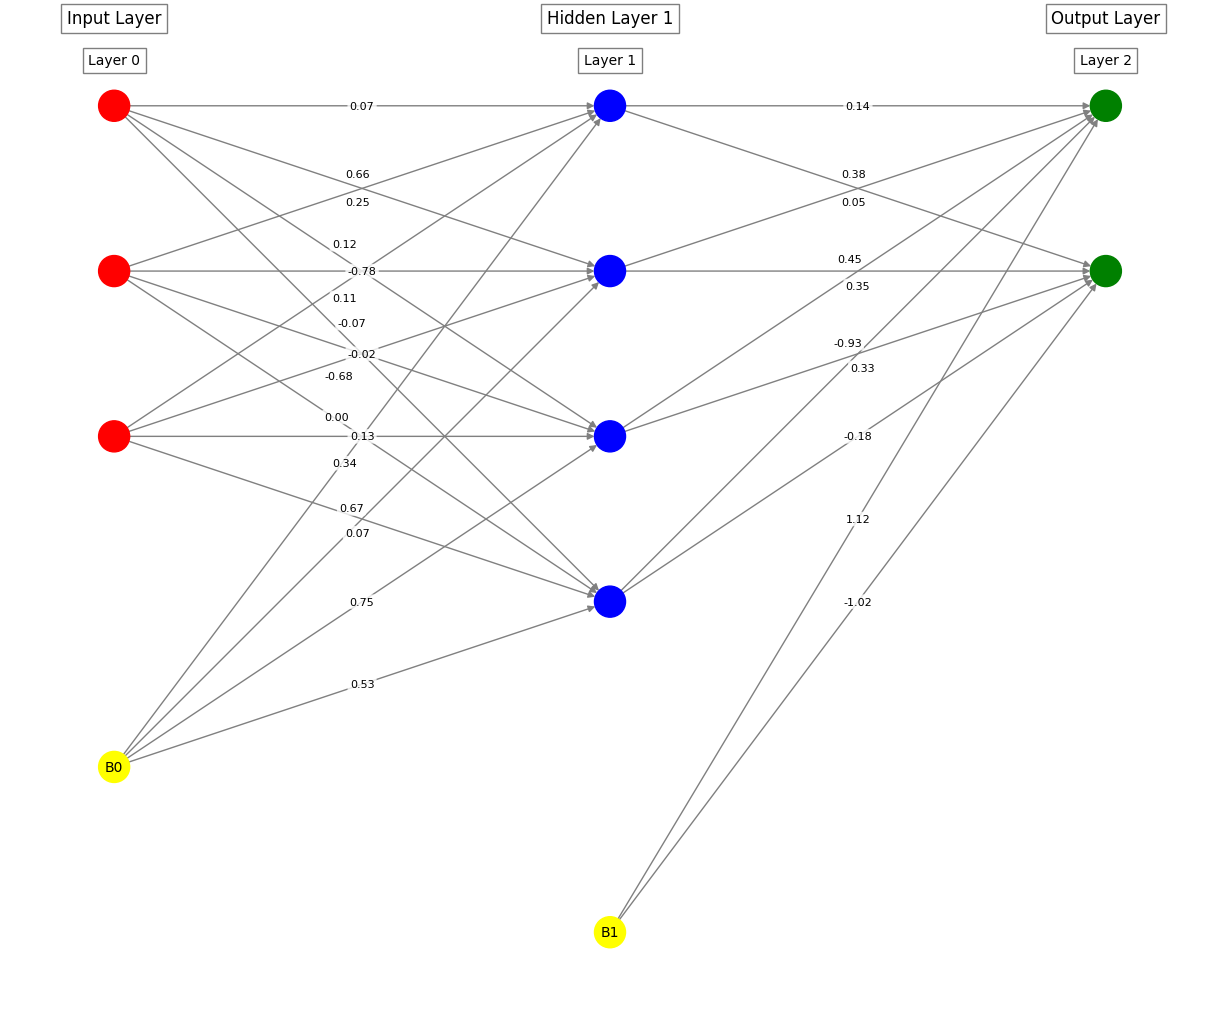

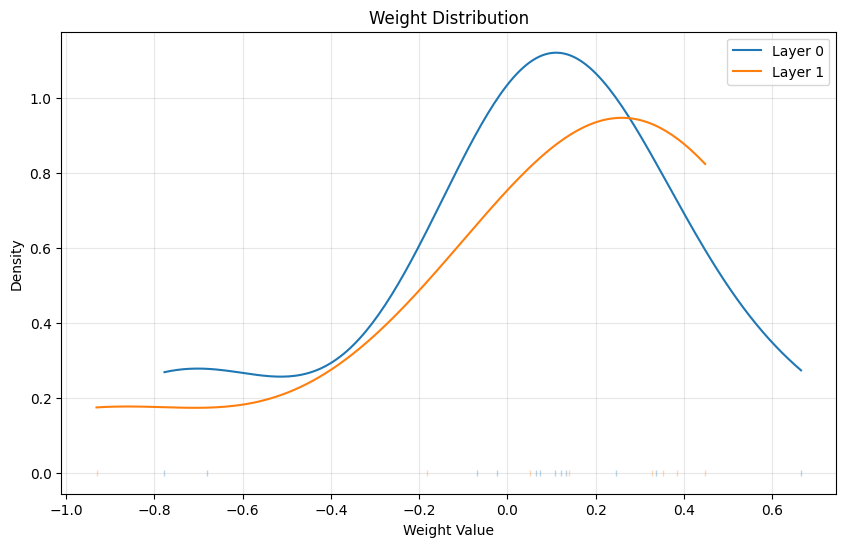

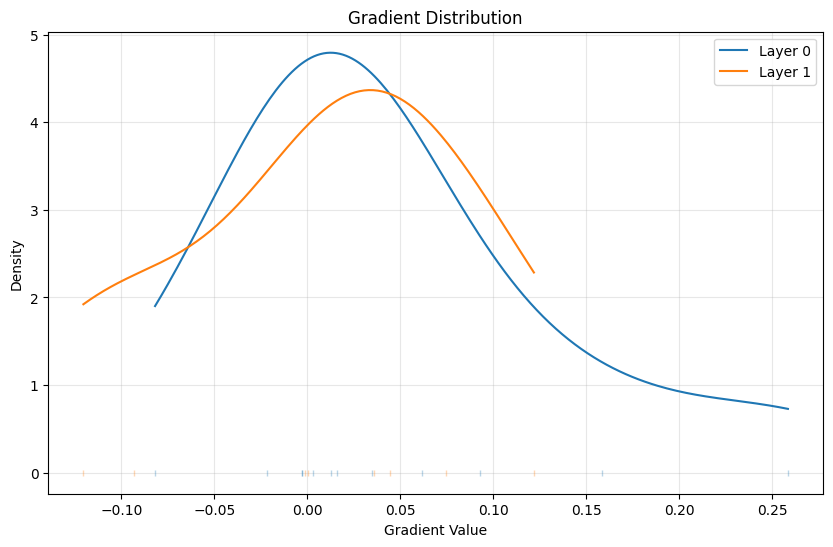

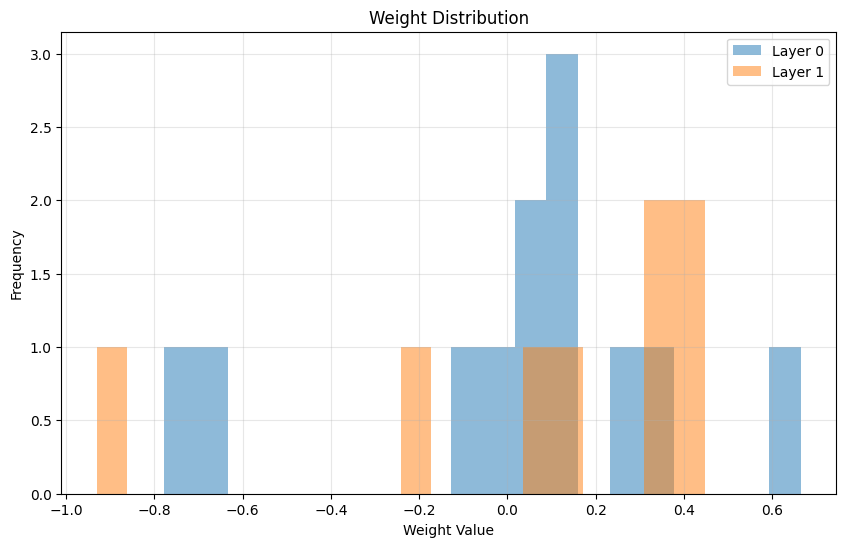

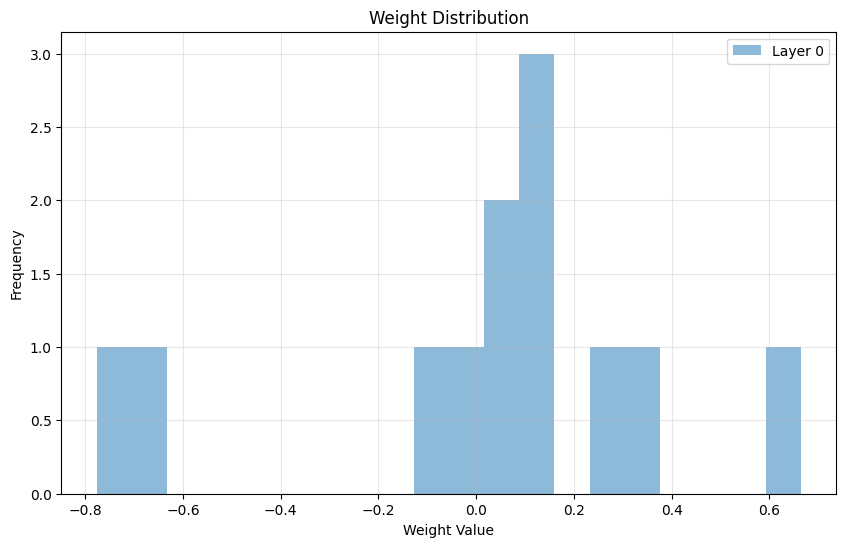

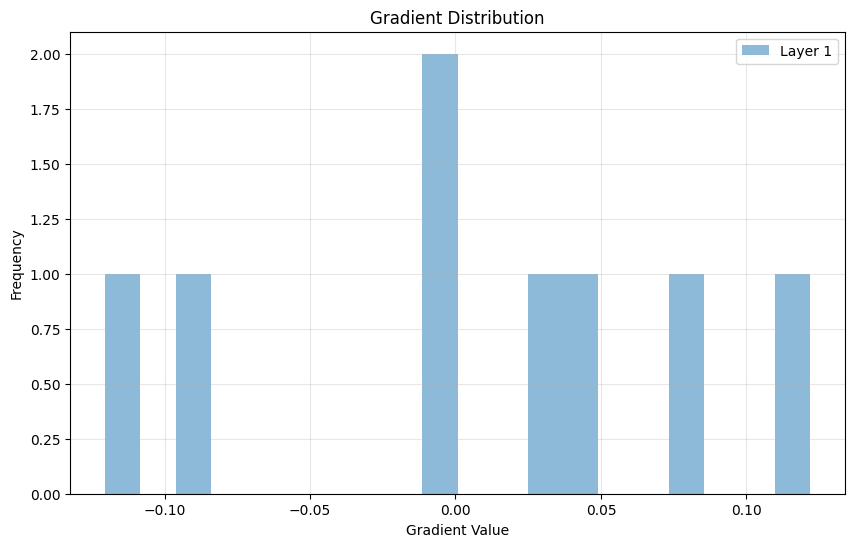

In [23]:
layers = [3, 4, 2]

custom_weights = [
    np.random.normal(0, 0.5, (3, 4)),
    np.random.normal(0, 0.5, (4, 2))
]

custom_gradients = [
    np.random.normal(0, 0.1, (3, 4)),
    np.random.normal(0, 0.1, (4, 2))
]

custom_biases = [
    np.random.normal(0, 0.3),  # Biases for the first hidden layer
    np.random.normal(0, 0.3)   # Biases for the output layer
]

visualizer = NeuralNetworkVisualizer(layers, 
                                   weights=custom_weights,
                                   gradients=custom_gradients)

visualizer.plot_network()

visualizer.plot_weight_distribution([0, 1], plot_type='line')

visualizer.plot_gradient_distribution([0, 1], plot_type='line')

visualizer.plot_weight_distribution([0, 1], plot_type='histogram')

visualizer.plot_weight_distribution([0])  # Plot only first layer weights
visualizer.plot_gradient_distribution([1])  # Plot only output layer gradients